**In this notebook, we will look at Association Rules and Collaborative Filtering**  

# Association Rules
**Also called Market Basket Analysis, or Affinity Analysis**

> _References:  
>  - http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/  
>  - https://pyshark.com/market-basket-analysis-using-association-rule-mining-in-python/  
>  - Data adapted from https://www.kaggle.com/heeraldedhia/groceries-dataset_  

Association rules help us identify what goes with what.  For example in a retail sales context, you may want to know that if a person buys bread, they are also likely to buy jam.  In such a case, you can recommend jam to a person who is buying bread, but hasn't brought jam yet.  Association rules are the basis for recommender systems, so if a person has watched Star Wars, they may be likely to watch Dune.  
  
The end game for Association Rules is a set of rules where for an `antecedent` we are able to predict the `consequent` with some level of confidence.  An association rule takes the form A → C, which is a way of saying that given A, what is the likelihood of C co-occurring.   
  
Note that this is not correlation, but expressed as a probability called 'confidence'.  A and B are called 'itemsets', which means that they represent one or a combination of multiple items in our data.  For example, if we are trying to determine the association rules for purchases of milk, bread and butter, then {milk} would be an 'itemset', and so would be {milk, bread}.  So a rule may look like {milk, bread} → {butter} with a confidence of 66%.  Or it may be simpler, {bread} → {butter} with a confidence of 50%.
  
## Metrics
  
### Support  
Support is calculated at the itemset level.  It is the ratio of how often an itemset appears in the dataset, divided by the total number of observations in the dataset.  

$support(itemset) = {\text{# of transactions in which }itemset \text{ appears} \over \text{Total # of transactions}}$  
  
Support is used to measure the abundance or frequency (often interpreted as significance or importance) of an itemset in a database. We refer to an itemset as a "frequent itemset" if support is larger than a specified minimum-support threshold. All subsets of a frequent itemset are also frequent.

The support for a rule is calculated as $\text{support}(A\rightarrow C) = \text{support}(A \cup C), \;\;\; \text{range: } [0, 1]$
  
  
### Confidence  
$\text{confidence}(A\rightarrow C) = \frac{\text{support}(A\rightarrow C)}{\text{support}(A)}, \;\;\; \text{range: } [0, 1]$  

### Lift  
Lift tells us how good is the rule at calculating the outcome while taking into account the popularity of itemset Y.

$\text{lift}(A\rightarrow C) = \frac{\text{confidence}(A\rightarrow C)}{\text{support}(C)}, \;\;\; \text{range: } [0, \infty]$  


### Leverage  

$\text{levarage}(A\rightarrow C) = \text{support}(A\rightarrow C) - \text{support}(A) \times \text{support}(C), \;\;\; \text{range: } [-1, 1]$  
  
Leverage computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. A leverage value of 0 indicates independence.


### Conviction  
  
$\text{conviction}(A\rightarrow C) = \frac{1 - \text{support}(C)}{1 - \text{confidence}(A\rightarrow C)}, \;\;\; \text{range: } [0, \infty]$  
  
A high conviction value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.  



_Source: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/_  

While the above is great to obtain a high level understanding, let us scale up our example and look at larger examples, and have the machine do these calculations for us.  

## Toy Example  
Let us calculate these metrics for {milk} → {butter}  

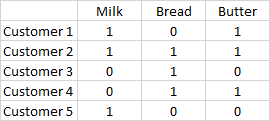  
  
**Support**  
support(milk) = 3/5 = 60%  
support(butter) = 3/5 = 60%  
support(milk AND butter) = 2/5 = 40%  

**Confidence**  
confidence(milk → butter) = 2/3 = 67%  
_or_, support(milk AND butter)/support(milk) = 40%/60% = 67%  

**Lift**  
lift(milk → butter) = 67% / 60% = 67% = 1.11

**Leverage**  
leverage(milk → butter) = 40% - (60% * 60%) = 0.04

**Conviction**  
conviction(milk → butter) = (1-60%)/(1-67%) = 1.21


**Next**, we create and test the above out using a Python library to do these calculations.  

In [1]:
# Usual library imports
import numpy as np
import pandas as pd


### Create toy dataframe

In [2]:
df = pd.DataFrame(
    {'Milk': {'Customer_1': True,
  'Customer_2': True,
  'Customer_3': False,
  'Customer_4': False,
  'Customer_5': True},
 'Bread': {'Customer_1': False,
  'Customer_2': True,
  'Customer_3': True,
  'Customer_4': True,
  'Customer_5': False},
 'Butter': {'Customer_1': True,
  'Customer_2': True,
  'Customer_3': False,
  'Customer_4': True,
  'Customer_5': False}})
df

,Milk,Bread,Butter
Customer_1,True,False,True
Customer_2,True,True,True
Customer_3,False,True,False
Customer_4,False,True,True
Customer_5,True,False,False


### List itemsets

In [3]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets_ap['length'] = frequent_itemsets_ap['itemsets'].apply(lambda x: len(x))

frequent_itemsets_ap

,support,itemsets,length
0,0.6,(Milk),1
1,0.6,(Bread),1
2,0.6,(Butter),1
3,0.2,"(Milk, Bread)",2
4,0.4,"(Milk, Butter)",2
5,0.4,"(Bread, Butter)",2
6,0.2,"(Milk, Butter, Bread)",3


### Generate rules

In [4]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)

rules_ap.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,"(Milk, Bread)",(Butter),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
10,(Butter),"(Milk, Bread)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2,1.000000
2,(Milk),(Butter),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Butter),(Milk),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Bread),(Butter),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Butter),(Bread),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
6,"(Milk, Butter)",(Bread),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
8,"(Bread, Butter)",(Milk),0.4,0.6,0.2,0.500000,0.833333,-0.04,0.8,-0.250000
9,(Milk),"(Bread, Butter)",0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333
11,(Bread),"(Milk, Butter)",0.6,0.4,0.2,0.333333,0.833333,-0.04,0.9,-0.333333


## Example with larger dataset
### Load data

In [5]:
df = pd.read_csv('groceries.csv', index_col=0)
df

,abrasive_cleaner,artif_sweetener,baby_cosmetics,bags,baking_powder,bathroom_cleaner,beef,berries,beverages,bottled_beer,...,UHT-milk,vinegar,waffles,whipped_sour_cream,whisky,white_bread,white_wine,whole_milk,yogurt,zwieback
Customer,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Change dataframe to boolean

In [6]:
df = df>0
print(df.shape)
df

(3898, 167)


,abrasive_cleaner,artif_sweetener,baby_cosmetics,bags,baking_powder,bathroom_cleaner,beef,berries,beverages,bottled_beer,...,UHT-milk,vinegar,waffles,whipped_sour_cream,whisky,white_bread,white_wine,whole_milk,yogurt,zwieback
Customer,,,,,,,,,,,,,,,,,,,,,
1000,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1001,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### List itemsets

In [7]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_ap = apriori(df, min_support=0.01, use_colnames=True)
frequent_itemsets_ap['length'] = frequent_itemsets_ap['itemsets'].apply(lambda x: len(x))

frequent_itemsets_ap.sort_values(by='support', ascending=False)

,support,itemsets,length
113,0.458184,(whole_milk),1
68,0.376603,(other_vegetables),1
83,0.349666,(rolls_buns),1
93,0.313494,(soda),1
114,0.282966,(yogurt),1
...,...,...,...
2419,0.010005,"(red_blush_wine, rolls_buns, other_vegetables)",3
1136,0.010005,"(semi-finished_bread, root_vegetables)",2
1878,0.010005,"(margarine, citrus_fruit, other_vegetables)",3
2380,0.010005,"(onions, rolls_buns, root_vegetables)",3


### Generate rulesets
**Rulesets, sorted by `lift`**

In [8]:
from mlxtend.frequent_patterns import association_rules

rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)

rules_ap.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9677,"(whole_milk, sausage, other_vegetables)","(yogurt, rolls_buns)",0.050282,0.111339,0.013597,0.270408,2.428689,0.007998,1.218025,0.619400
9687,"(yogurt, rolls_buns)","(whole_milk, sausage, other_vegetables)",0.111339,0.050282,0.013597,0.122120,2.428689,0.007998,1.081831,0.661957
9681,"(yogurt, rolls_buns, other_vegetables)","(whole_milk, sausage)",0.052335,0.106978,0.013597,0.259804,2.428575,0.007998,1.206467,0.620721
9684,"(whole_milk, sausage)","(yogurt, rolls_buns, other_vegetables)",0.106978,0.052335,0.013597,0.127098,2.428575,0.007998,1.085650,0.658702
8187,"(yogurt, curd)","(whole_milk, sausage)",0.040277,0.106978,0.010005,0.248408,2.322046,0.005696,1.188173,0.593239
...,...,...,...,...,...,...,...,...,...,...
840,(dessert),(domestic_eggs),0.086455,0.133145,0.010262,0.118694,0.891466,-0.001249,0.983603,-0.117598
5544,"(tropical_fruit, newspapers)",(other_vegetables),0.036942,0.376603,0.012314,0.333333,0.885104,-0.001598,0.935095,-0.118779
5296,(long_life_bakery_product),"(whole_milk, other_vegetables)",0.065418,0.191380,0.011031,0.168627,0.881112,-0.001488,0.972632,-0.126160
5536,"(sausage, other_vegetables)",(newspapers),0.092868,0.139815,0.011288,0.121547,0.869340,-0.001697,0.979204,-0.142136


**Sorted by `confidence`**

In [9]:
rules_ap.sort_values(by='confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4564,"(domestic_eggs, meat)",(whole_milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
3745,"(chocolate, fruit_vegetable_juice)",(whole_milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
9655,"(yogurt, rolls_buns, bottled_water, other_vege...",(whole_milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
7486,"(pip_fruit, bottled_water, yogurt)",(whole_milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
7708,"(yogurt, rolls_buns, brown_bread)",(whole_milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
...,...,...,...,...,...,...,...,...,...,...
2055,(bottled_beer),"(pastry, other_vegetables)",0.158799,0.071575,0.015906,0.100162,1.399390,0.004540,1.031768,0.339280
2000,(bottled_beer),"(whole_milk, domestic_eggs)",0.158799,0.070292,0.015906,0.100162,1.424926,0.004743,1.033194,0.354504
296,(brown_bread),(chocolate),0.135967,0.086455,0.013597,0.100000,1.156677,0.001842,1.015050,0.156770
2877,(brown_bread),"(whole_milk, curd)",0.135967,0.063622,0.013597,0.100000,1.571774,0.004946,1.040420,0.421021


**Sorted by `support`**

In [10]:
rules_ap.sort_values(by='support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1343,(other_vegetables),(whole_milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643,0.157802
1342,(whole_milk),(other_vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
1476,(whole_milk),(rolls_buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
1477,(rolls_buns),(whole_milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190,0.157955
1574,(soda),(whole_milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971,0.071966
...,...,...,...,...,...,...,...,...,...,...
5903,(soft_cheese),"(rolls_buns, other_vegetables)",0.037712,0.146742,0.010005,0.265306,1.807978,0.004471,1.161379,0.464409
7235,"(citrus_fruit, bottled_water)","(whole_milk, yogurt)",0.045151,0.150590,0.010005,0.221591,1.471484,0.003206,1.091213,0.335565
7234,"(yogurt, bottled_water)","(whole_milk, citrus_fruit)",0.066444,0.092355,0.010005,0.150579,1.630438,0.003869,1.068546,0.414188
7233,"(yogurt, citrus_fruit)","(whole_milk, bottled_water)",0.058235,0.112365,0.010005,0.171806,1.528996,0.003462,1.071772,0.367370


***
***

# Collaborative Filtering


Collaborative filtering aims to predict the ratings a given user will give to an item that this user has not yet purchased/watched/consumed.  

It does so by identifying other users similar to this user, and looking at the ratings they have provided to the item in question.  If the predicted rating is high, then it would make sense to recommend that item to the user.

Consider the table below:  
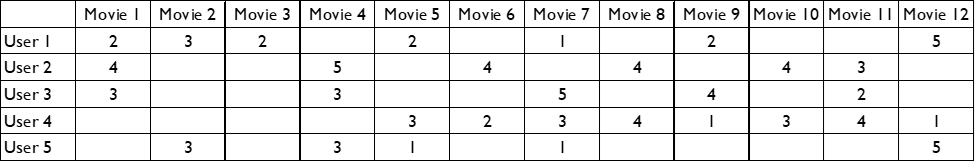
 

There are 5 users, who have rated 12 movies using a rating scale of 1 to 5.  Many of the cells are blank, which is because not every user has rated every movie.

Our task is to decide what movie to recommend to a user to watch next.  To do this, we use the following approach:

1. Find users similar to a given user.  Similarity between users is determined solely based on the ratings they have provided, and not on features outside the ratings matrix (eg, age, location etc).  There are many ways to determine which users are similar.  

2. Estimate the rating for unwatched movies based on such ‘similar’ users.  Again, there are many ways to determine the rating estimate, eg average, median, max, etc.

The accuracy of predicted ratings can be determined using MSE/RMSE, or MAE and such metrics.  Once the predictions are known, we can use these to determine the movies to recommend next.

***

The surprise library (`pip install scikit-surprise`) provides several algorithms to perform collaborative filtering, and predict ratings.

To use the surprise library, data needs to be in a certain format.  We need to know the UserID, the ItemID and the Rating, and supply it to the library in exactly that order to create a surprise 'dataset'!  No other order will work.


**First, the usual library imports**

In [11]:
import pandas as pd
import numpy as np

## Creating a toy dataset
We create a random dataframe.  There are 5 users, who have rated some movies out of 12 movies.

In [12]:
df = pd.DataFrame({'Movie 1': {'User 1': 2.0,   'User 2': 4.0,   'User 3': 3.0,   'User 4': np.nan,   'User 5': np.nan},
 'Movie 2': {'User 1': 3.0,   'User 2': np.nan,   'User 3': np.nan,   'User 4': np.nan,   'User 5': 3.0},
 'Movie 3': {'User 1': 2.0,   'User 2': np.nan,   'User 3': np.nan,   'User 4': np.nan,   'User 5': np.nan},
 'Movie 4': {'User 1': np.nan,   'User 2': 5.0,   'User 3': 3.0,   'User 4': np.nan,   'User 5': 3.0},
 'Movie 5': {'User 1': 2.0,   'User 2': np.nan,   'User 3': np.nan,   'User 4': 3.0,   'User 5': 1.0},
 'Movie 6': {'User 1': np.nan,   'User 2': 4.0,   'User 3': np.nan,   'User 4': 2.0,   'User 5': np.nan},
 'Movie 7': {'User 1': 1.0,   'User 2': np.nan,   'User 3': 5.0,   'User 4': 3.0,   'User 5': 1.0},
 'Movie 8': {'User 1': np.nan,   'User 2': 4.0,   'User 3': np.nan,   'User 4': 4.0,   'User 5': np.nan},
 'Movie 9': {'User 1': 2.0,   'User 2': np.nan,   'User 3': 4.0,   'User 4': 1.0,   'User 5': np.nan},
 'Movie 10': {'User 1': np.nan,   'User 2': 4.0,   'User 3': np.nan,   'User 4': 3.0,   'User 5': np.nan},
 'Movie 11': {'User 1': np.nan,   'User 2': 3.0,   'User 3': 2.0,   'User 4': 4.0,   'User 5': np.nan},
 'Movie 12': {'User 1': 5.0,   'User 2': np.nan,   'User 3': np.nan,   'User 4': 1.0,   'User 5': 5.0}})

In [13]:
df.reset_index()

,index,Movie 1,Movie 2,Movie 3,Movie 4,Movie 5,Movie 6,Movie 7,Movie 8,Movie 9,Movie 10,Movie 11,Movie 12
0,User 1,2.0,3.0,2.0,NaN,2.0,NaN,1.0,NaN,2.0,NaN,NaN,5.0
1,User 2,4.0,NaN,NaN,5.0,NaN,4.0,NaN,4.0,NaN,4.0,3.0,NaN
2,User 3,3.0,NaN,NaN,3.0,NaN,NaN,5.0,NaN,4.0,NaN,2.0,NaN
3,User 4,NaN,NaN,NaN,NaN,3.0,2.0,3.0,4.0,1.0,3.0,4.0,1.0
4,User 5,NaN,3.0,NaN,3.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,5.0


Now we need to get the ratings matrix in a format that the `surprise` library can consume.  We need to split out the **user, item, rating** in exactly that order in a dataframe, which we can do by using `melt`, and then we drop the NaNs.

In [14]:
redesigned_df = pd.melt(df.reset_index(), id_vars='index', value_vars=[col for col in df if col.startswith('M')])
redesigned_df.dropna(inplace=True)
redesigned_df.reset_index(drop=True, inplace=True)
redesigned_df

,index,variable,value
0,User 1,Movie 1,2.0
1,User 2,Movie 1,4.0
2,User 3,Movie 1,3.0
3,User 1,Movie 2,3.0
4,User 5,Movie 2,3.0
5,User 1,Movie 3,2.0
6,User 2,Movie 4,5.0
7,User 3,Movie 4,3.0
8,User 5,Movie 4,3.0
9,User 1,Movie 5,2.0


## The `surprise` library
Next, we import the surprise library and convert our dataframe to a `Dataset` that the _surprise_ library can consume.  More information on the library is available at https://surprise.readthedocs.io/

In [15]:
from surprise import Dataset
from surprise import Reader
reader = Reader(rating_scale=(1, 5))
# each line needs to respect the following structure: user ; item ; rating ; [timestamp]
data = Dataset.load_from_df(redesigned_df[['index', 'variable', 'value']], reader)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\surprise\__init__.py:1: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution
C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pkg_resources\__init__.py:2871: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('zope')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)


In [16]:
# let us look at the data
data.raw_ratings

[('User 1', 'Movie 1', 2.0, None),
 ('User 2', 'Movie 1', 4.0, None),
 ('User 3', 'Movie 1', 3.0, None),
 ('User 1', 'Movie 2', 3.0, None),
 ('User 5', 'Movie 2', 3.0, None),
 ('User 1', 'Movie 3', 2.0, None),
 ('User 2', 'Movie 4', 5.0, None),
 ('User 3', 'Movie 4', 3.0, None),
 ('User 5', 'Movie 4', 3.0, None),
 ('User 1', 'Movie 5', 2.0, None),
 ('User 4', 'Movie 5', 3.0, None),
 ('User 5', 'Movie 5', 1.0, None),
 ('User 2', 'Movie 6', 4.0, None),
 ('User 4', 'Movie 6', 2.0, None),
 ('User 1', 'Movie 7', 1.0, None),
 ('User 3', 'Movie 7', 5.0, None),
 ('User 4', 'Movie 7', 3.0, None),
 ('User 5', 'Movie 7', 1.0, None),
 ('User 2', 'Movie 8', 4.0, None),
 ('User 4', 'Movie 8', 4.0, None),
 ('User 1', 'Movie 9', 2.0, None),
 ('User 3', 'Movie 9', 4.0, None),
 ('User 4', 'Movie 9', 1.0, None),
 ('User 2', 'Movie 10', 4.0, None),
 ('User 4', 'Movie 10', 3.0, None),
 ('User 2', 'Movie 11', 3.0, None),
 ('User 3', 'Movie 11', 2.0, None),
 ('User 4', 'Movie 11', 4.0, None),
 ('User 1', 'Mo

## Building the model
### With train/test split
Next, we do a train/test split, and train the model.  Note the model is contained in an object called `algo`.

In [17]:
from surprise import SVD, KNNBasic, SlopeOne
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

# We use the test dataset above
data = data

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# You can try different algorithms, looking to reduced your RMSE
# algo = SVD()
algo = KNNBasic()
# algo = SlopeOne()

# Train the algorithm on the trainset, and predict ratings for the testset


algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.4238


2.4238399287081647

In [18]:
# We can now look at the predictions
predictions

[Prediction(uid='User 4', iid='Movie 12', r_ui=1.0, est=5, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='User 1', iid='Movie 9', r_ui=2.0, est=1, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='User 4', iid='Movie 10', r_ui=3.0, est=4.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='User 2', iid='Movie 8', r_ui=4.0, est=4.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='User 1', iid='Movie 2', r_ui=3.0, est=3.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='User 4', iid='Movie 7', r_ui=3.0, est=1, details={'actual_k': 2, 'was_impossible': False}),
 Prediction(uid='User 3', iid='Movie 9', r_ui=4.0, est=1, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid='User 3', iid='Movie 7', r_ui=5.0, est=1, details={'actual_k': 2, 'was_impossible': False})]

### Using the entire dataset
Above, we did a train test split, but we can also use the entire dataset and train a model based on that.  We do that next.

In [19]:
# You can also use the entire dataset without doing a train-test split
trainset = data.build_full_trainset()

# Build an algorithm, and train it.
algo = KNNBasic()
algo.fit(trainset)
algo.predict(uid='User 4', iid='Movie 6')

Computing the msd similarity matrix...
Done computing similarity matrix.


Prediction(uid='User 4', iid='Movie 6', r_ui=None, est=2.5714285714285716, details={'actual_k': 2, 'was_impossible': False})

***
## Tying it all up
The above is interesting, but in fact what we need is a prediction of what to recommend to each user.  The code below brings everything together.

Below is a full implementation that uses the ratings data to predict ratings for the missing ratings, and then provides what movies to recommend to each user.  

We fit our algorithm on the entire dataset, then get predictions on the empty rating cells using a method `build_anti_testset()`.  A function iterates through everything, sorts and brings out the movies to recommend.

In [20]:
# Source: https://surprise.readthedocs.io/en/stable/FAQ.html#how-to-get-the-top-n-recommendations-for-each-user

from collections import defaultdict

from surprise import SVD
from surprise import Dataset


def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


# First train an SVD algorithm on the movielens dataset.
# data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()
algo = SVD()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

User 1 ['Movie 4', 'Movie 10', 'Movie 8', 'Movie 11', 'Movie 6']
User 2 ['Movie 12', 'Movie 7', 'Movie 2', 'Movie 5', 'Movie 3', 'Movie 9']
User 3 ['Movie 8', 'Movie 6', 'Movie 2', 'Movie 10', 'Movie 12', 'Movie 5', 'Movie 3']
User 5 ['Movie 8', 'Movie 6', 'Movie 1', 'Movie 10', 'Movie 3', 'Movie 11', 'Movie 9']
User 4 ['Movie 4', 'Movie 2', 'Movie 1', 'Movie 3']
